# Основные концепции Machine Learning. Домашняя работа

In [1]:
### Тут нужно сделать импорты всех необходимых библиотек ###

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # для отрисовки 3D проекции

from sklearn.linear_model import LinearRegression # линейная регрессия
from sklearn.tree import DecisionTreeClassifier # классификация
from sklearn.tree import export_text
from sklearn.cluster import KMeans # кластеризация

In [3]:
### Здесь требуется загрузить датасет phones.csv ###

In [4]:
# загружаем данные
phones = pd.read_csv("1.8_phones.csv")
phones.head(50)

,disk,os,price,year
0,64,Android,7256,2016
1,128,Android,7623,2015
2,64,Android,1916,2010
3,512,iOS,15045,2017
4,16,Android,4478,2013
5,512,iOS,15842,2018
6,128,Android,7191,2015
7,64,Android,4277,2013
8,512,iOS,12797,2015
9,64,Android,6256,2015


In [5]:
### Опционально: используя matplotlib, можно сделать визуализацию загруженного датасета ###

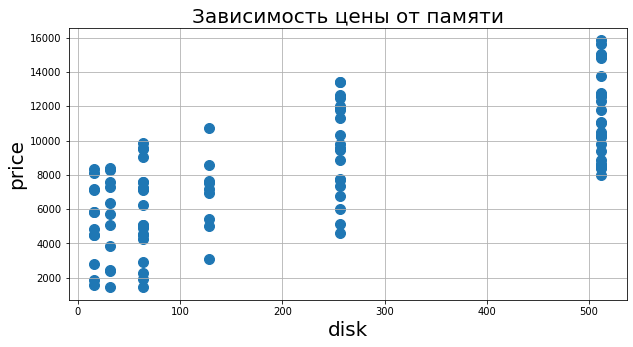

In [6]:
plt.figure(figsize=(10, 5)) 
plt.scatter(phones["disk"], phones["price"], s=100)
plt.xlabel('disk', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.title('Зависимость цены от памяти', fontsize=20)
plt.grid()
plt.show()

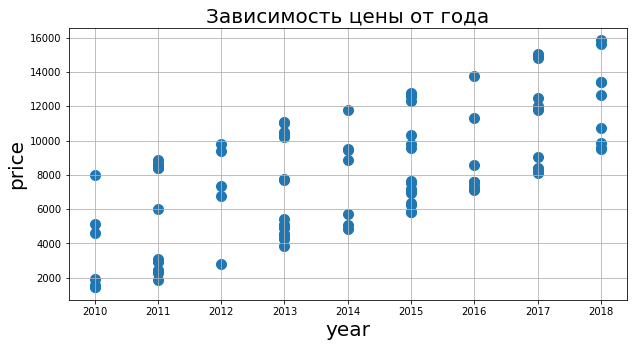

In [7]:
plt.figure(figsize=(10, 5)) 
plt.scatter(phones["year"], phones["price"], s=100)
plt.xlabel('year', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.title('Зависимость цены от года', fontsize=20)
plt.grid()
plt.show()

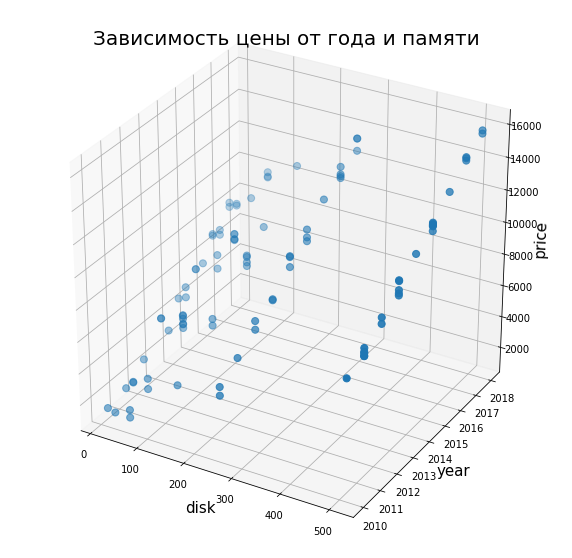

In [8]:
plt.figure(figsize=(10, 10)) 
ax = plt.axes(projection="3d") 
ax.scatter(phones["disk"], phones["year"], phones["price"], s=50)
plt.xlabel('disk', fontsize=15)
plt.ylabel('year', fontsize=15)
ax.set_zlabel('price', fontsize=15)
plt.title('Зависимость цены от года и памяти', fontsize=20)
plt.grid()
plt.show()

Задание 1: обучить модель регрессии

**1**  <br>
предсказать цену телефона <br>
y = k * x + b <br>
y - цена, x - объем памяти <br>

In [9]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = 
# y =

In [10]:
X = phones[["disk"]]
y = phones["price"]

In [11]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [12]:
reg = LinearRegression().fit(X, y)
reg.predict(X[0:1])[0], y[0]

(6120.265447090668, 7256)

In [13]:
#y = k * x + b - линейная функция
[k] = reg.coef_
b = reg.intercept_
print('y = ', k, ' * x + ', b)

y =  12.99102657169449  * x +  5288.839746502221


In [14]:
# через встроенную функция
x_ = np.linspace(X.disk.min(), X.disk.max(), 100)
x_=x_.reshape(-1, 1)
y_ = reg.predict(x_)

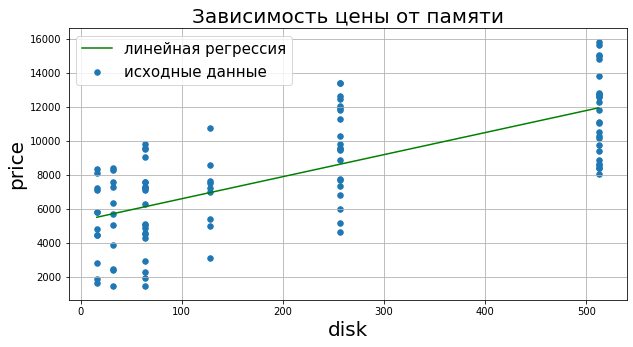

In [15]:
plt.figure(figsize=(10, 5)) 
plt.plot(x_, y_, color = 'g', label ='линейная регрессия')
plt.scatter(phones["disk"], phones["price"], s=30, label ='исходные данные')
plt.xlabel('disk', fontsize=20)
plt.ylabel('price', fontsize=20)
plt.title('Зависимость цены от памяти', fontsize=20)
plt.legend(prop={'size': 15})
plt.grid()
plt.show()

**2**  <br>
предсказать цену телефона <br>
y = k1 * x1 + k2 * x2 + b <br>
y - цена, x1 - объем памяти, x2 - год <br>

In [16]:
X = phones[["disk", "year"]]
y = phones["price"]

In [17]:
reg = LinearRegression().fit(X, y)
reg.predict(X[0:1])[0], y[0]

(7848.046694419114, 7256)

In [19]:
#y = k1 * x1 + k2 * x2 + b - линейная функция
[k1, k2] = reg.coef_
b = reg.intercept_
print('y = ', k1, ' * x1 + ', k2, ' * x2 + ', b)

y =  13.578776616562966  * x1 +  1021.2761652841648  * x2 +  -2051913.7442219171


In [20]:
x1_ = np.linspace(X.disk.min(), X.disk.max(), 100)
x2_ = np.linspace(X.year.min(), X.year.max(), 100)
x1__, x2__ = np.meshgrid(x1_, x2_) # поле х - у

In [21]:
# через встроенную функция
reg.predict(np.concatenate([x1__.ravel().reshape(-1,1), x2__.ravel().reshape(-1,1)], axis=1))

array([ 1068.60842512,  1136.63946756,  1204.67051   , ...,
       15837.82886432, 15905.85990677, 15973.89094921])

In [22]:
# через функцию
def y (x1, x2):
    return k1 * x1 + k2 * x2 + b
y__ = y (x1__, x2__)

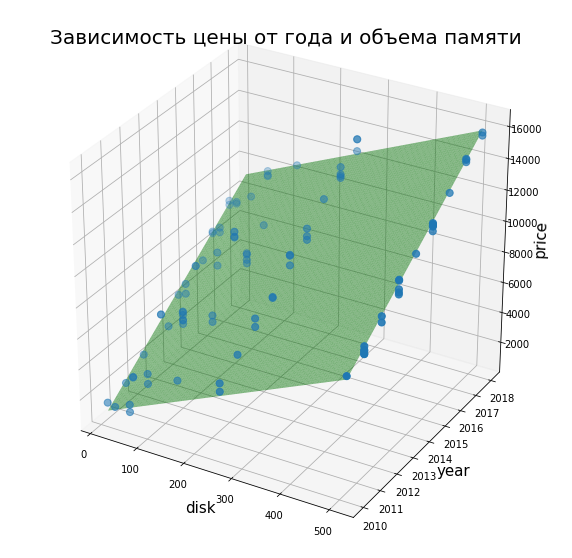

In [23]:
plt.figure(figsize=(10, 10)) 
ax = plt.axes(projection="3d") 
ax.scatter(phones["disk"], phones["year"], phones["price"], s=50, label ='исходные данные')
ax.plot_trisurf(x1__.ravel(), x2__.ravel(), y__.ravel(), color = 'g', alpha = 0.5, label ='линейная регрессия')
plt.xlabel('disk', fontsize=15)
plt.ylabel('year', fontsize=15)
ax.set_zlabel('price', fontsize=15)
plt.title('Зависимость цены от года и объема памяти', fontsize=20)
plt.grid()
plt.show()

Задание 2: обучить модель классификации

предсказать операционную систему

In [24]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = "disk", "price", "year"
# y ="os"

In [25]:
X = phones[["disk", "price", "year"]]
y = phones["os"]

In [26]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [27]:
cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_0 <= 192.00
|   |--- class: Android
|--- feature_0 >  192.00
|   |--- class: iOS



In [28]:
cl.predict(X[7:10]), y[7:10]

(array(['Android', 'iOS', 'Android'], dtype=object),
 7    Android
 8        iOS
 9    Android
 Name: os, dtype: object)

In [46]:
# X =  "price"
# y ="os"

In [47]:
X = phones[["price",]]
y = phones["os"]

In [48]:
cl = DecisionTreeClassifier().fit(X, y)
print(export_text(cl))

|--- feature_0 <= 7660.50
|   |--- feature_0 <= 4577.00
|   |   |--- class: Android
|   |--- feature_0 >  4577.00
|   |   |--- feature_0 <= 4720.00
|   |   |   |--- class: iOS
|   |   |--- feature_0 >  4720.00
|   |   |   |--- feature_0 <= 6875.50
|   |   |   |   |--- feature_0 <= 6561.50
|   |   |   |   |   |--- feature_0 <= 5124.50
|   |   |   |   |   |   |--- class: Android
|   |   |   |   |   |--- feature_0 >  5124.50
|   |   |   |   |   |   |--- feature_0 <= 5282.50
|   |   |   |   |   |   |   |--- class: iOS
|   |   |   |   |   |   |--- feature_0 >  5282.50
|   |   |   |   |   |   |   |--- feature_0 <= 5901.50
|   |   |   |   |   |   |   |   |--- class: Android
|   |   |   |   |   |   |   |--- feature_0 >  5901.50
|   |   |   |   |   |   |   |   |--- feature_0 <= 6119.00
|   |   |   |   |   |   |   |   |   |--- class: iOS
|   |   |   |   |   |   |   |   |--- feature_0 >  6119.00
|   |   |   |   |   |   |   |   |   |--- class: Android
|   |   |   |   |--- feature_0 >  6561.50
|   

In [ ]:
# операционную систему определяет только объем памяти

Задание 3: обучить модель кластеризации

признаки - память, цена <br>
количество кластеров = 2 (ос)

In [29]:
### Тут нужно выгрузить в соответствующие переменные выбранные признаки ###
# X = 

In [30]:
X = phones[["disk", "price"]]

In [31]:
import random
# функция задания рандомного цвета
def random_color():
    color="#"
    for j in range(6):
        color+=''.join(random.choice('0123456789ABCDEF'))  
    return(color)

In [32]:
n_year = phones.year.unique()
n_year

array([2016, 2015, 2010, 2017, 2013, 2018, 2012, 2011, 2014], dtype=int64)

In [33]:
# создание словаря год - цвет
colors = {}
for i in range (len(n_year)):
    colors[n_year[i]] = random_color()
colors

{2016: '#25C19F',
 2015: '#B1006E',
 2010: '#F87896',
 2017: '#EBA360',
 2013: '#EA5419',
 2018: '#1A25CD',
 2012: '#3A3447',
 2011: '#0CEBE0',
 2014: '#97F422'}

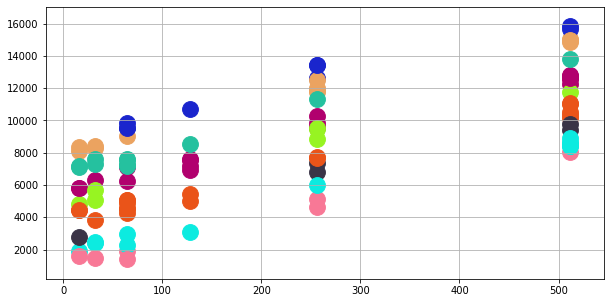

In [34]:
# по году выпуска
plt.figure(figsize=(10, 5))
for d1, d2, l in zip(phones.disk, phones.price, phones.year):
    plt.scatter(d1, d2, s=250,  color = colors[l])
plt.grid()
plt.show()

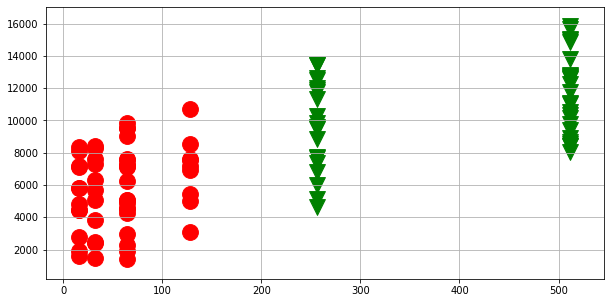

In [35]:
# по операционной системе
colors = {"Android": "r", "iOS": "g"}
markers = {"Android": "o", "iOS": "v"}

plt.figure(figsize=(10, 5))
for d1, d2, l in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l], color = colors[l])
plt.grid()
plt.show()

In [36]:
### Здесь следует запустить процесс обучения ###
### и продемонстрировать работоспобность обученной модели ###

In [37]:
n = 2 # количество центров

In [38]:
clust = KMeans(n_clusters=n).fit(X)
[c1, c2] = clust.cluster_centers_
clust.cluster_centers_

array([[  116.8       ,  5784.78333333],
       [  368.        , 11601.65      ]])

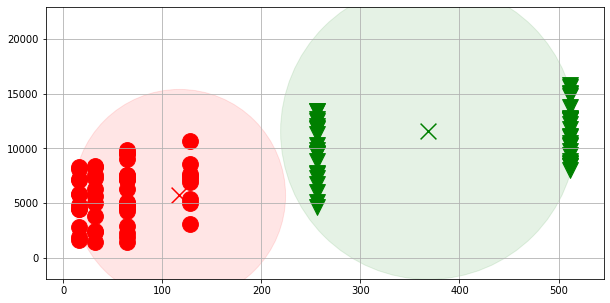

In [45]:
colors = {"Android": "r", "iOS": "g"}
markers = {"Android": "o", "iOS": "v"}

plt.figure(figsize=(10, 5))
for d1, d2, l in zip(phones.disk, phones.price, phones.os):
    plt.scatter(d1, d2, s=250, marker=markers[l], color = colors[l])
    
plt.scatter(c1[0], c1[1], s=250, marker="x", c="r")
plt.scatter(c1[0], c1[1], s=250 * 1.8e2, c="r", alpha=0.1)

plt.scatter(c2[0], c2[1], s=250, marker="x", c="g")
plt.scatter(c2[0], c2[1], s=250 * 3.5e2, c="g", alpha=0.1)

plt.grid()
plt.show()